<a href="https://colab.research.google.com/github/ahnjongin/deeplearning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 개요-조건문

In [ ]:
flag=int(input("학생이면 1, 아니면 0"))
if(flag!=1):
  print("학생이 아니군요..")
else:
  print("학생이군요") 

파이썬 개요-반복문

In [ ]:
lcnt =1
sum=0
while(lcnt<=100):
  sum+=lcnt
  lcnt+=1
print(sum)

5050


In [ ]:
items=["국어","영어","수학"]
for subject in items:
  print(subject)

국어
영어
수학


In [ ]:
sum=0
for i in range(1,100):
  sum+=i
print(sum)

4950


파이썬 개요-함수

In [ ]:
def FunA():
  print("안종인")
def FunB():
  print("안준영")
def FunC():
  print("안준준")

FunA()
FunB()
FunC()

안종인
안준영
안준준


In [ ]:
def CalculSum(start,end):
  sum=0
  for i in range(start,end+1):
    sum += i
  return sum
  
print(CalculSum(1,100))

5050


In [ ]:
import urllib.request
import json
def searchbook(title):
  client_id="bOAumkpzmi4oThG5kN2e"
  client_secret="pOsWpxRZNC"

  url= "https://openapi.naver.com/v1/search/book.json"
  option="&display=3&sort=count"
  query="?query="+urllib.parse.quote(title)

  url_query=url+query+option
#https://openapi.naver.com/v1/search/book.json?query=[입력내용]&display=3&sort=count
  request=urllib.request.Request(url_query)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)

#open API 요청
  response=urllib.request.urlopen(request)
  rescode=response.getcode()

  if(rescode==200): #성공
    response_body=response.read()
    return response_body.decode('utf-8')
  else:
    return None

In [ ]:
def showitem(item):
  print("제목:"+item['title'])
  print("설명:"+item['description'])
  print("url:"+item['link'])
  print("===================")

In [ ]:
  res=searchbook(input("질의:"))
  if(res==None):
    print("검색 실패!!")
  else:
    jres=json.loads(res)
    if(jres==None):
      print("json.loads 실패!!!")
    else:
      for post in jres['items']:
        showitem(post)

질의:행복
제목:완전한 <b>행복</b> (정유정 장편소설)
설명:《완전한 <b>행복</b>》으로 돌아왔다. 500여 쪽을 꽉 채운 압도적인 서사와 적재적소를 타격하는 속도감... 《완전한 <b>행복</b>》은 버스도 다니지 않는 버려진 시골집에서 늪에 사는 오리들을 먹이기 위해 오리... 얼굴을 맞대고 웃고 있지만 그들이 추구하는 서로 다른 <b>행복</b>은 서서히 불협화음을 만들어낸다. 이 기묘한... 
url:http://book.naver.com/bookdb/book_detail.php?bid=20578083
제목:곰돌이 푸, <b>행복</b>한 일은 매일 있어 (아직 <b>행복</b>을 기다리는 우리에게)
설명:이 책 『곰돌이 푸, <b>행복</b>한 일은 매일 있어』는 곰돌이 푸의 긍정적인 기운과 ‘나의 삶은 나의 방식으로 정한다’라고 말했던 독일의 철학자 니체의 말... <b>행복</b>은 여전히 먼 곳에 있고, 나는 어떤 사람인지, 나는 무엇을 할 때 <b>행복</b>했는지에 대한 기억도 점차 흐려져 오늘도 ‘<b>행복</b>’을 찾는 일이 영 요원하게... 
url:http://book.naver.com/bookdb/book_detail.php?bid=13394898
제목:법륜 스님의 <b>행복</b> (<b>행복</b>해지고 싶지만 길을 몰라 헤매는 당신에게)
설명:당신은 <b>행복</b>해질 권리가 있다법륜 스님은 지난 30년 동안 우리나라 전국방방곡곡은 물론 세계 115개 도시의 강연장과 길 위에서 수많은 사람들을 만나왔다.... 일견 다 다른 질문 같지만 자세히 들여다보면 문제는 결국 ‘<b>행복</b>’이다.

『법륜 스님의 <b>행복</b>』은 그 간절한 물음에 대한 응답이다. 수많은 사람들이... 
url:http://book.naver.com/bookdb/book_detail.php?bid=10037014


파이썬 개요-Open API활용(XML)

In [ ]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

def searchbook2(title):
  client_id="bOAumkpzmi4oThG5kN2e"
  client_secret="pOsWpxRZNC"
#쿼리 문자열 : 사이트주소?인자명=값&인자명=값...
  url = "https://openapi.naver.com/v1/search/book.xml"

  option="&display=3&sort=count"

  query="?query="+urllib.parse.quote(title)  

  url_query=url+query+option #https://openapi.naver.com/v1/search/book.xml?query=[입력]&display=3&sort=count

  request=urllib.request.Request(url_query)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)

  response=urllib.request.urlopen(request)
  if response.getcode() != 200:
    return None
  else:
   return response.read().decode('utf-8')


In [ ]:
def showitem2(item):
  print("<<<<===")
  print("제목:",item.title.get_text())
  print("설명:"+item.description.get_text())
  print("====>>>>")

In [ ]:
def makeexcel(items,path):
  result=[]
  for item in items:
    result.append([item.title.get_text()]+[item.description.get_text()])
  table=pd.DataFrame(result,columns=('title','description'))
  table.to_excel(path)

In [ ]:
def main():
  title=input("제목:")
  res=searchbook2(title)
  if(res==None):
    print("검색실패!!")
    exit()
  xmlsoup=BeautifulSoup(res,'html.parser')
  items=xmlsoup.find_all('item')
  for item in items:
    showitem2(item)
  makeexcel(items,"data.xlsx")

In [ ]:
main()

제목:행복
<<<<===
제목: 완전한 <b>행복</b> (정유정 장편소설)
설명:《완전한 <b>행복</b>》으로 돌아왔다. 500여 쪽을 꽉 채운 압도적인 서사와 적재적소를 타격하는 속도감... 《완전한 <b>행복</b>》은 버스도 다니지 않는 버려진 시골집에서 늪에 사는 오리들을 먹이기 위해 오리... 얼굴을 맞대고 웃고 있지만 그들이 추구하는 서로 다른 <b>행복</b>은 서서히 불협화음을 만들어낸다. 이 기묘한... 
====>>>>
<<<<===
제목: 곰돌이 푸, <b>행복</b>한 일은 매일 있어 (아직 <b>행복</b>을 기다리는 우리에게)
설명:이 책 『곰돌이 푸, <b>행복</b>한 일은 매일 있어』는 곰돌이 푸의 긍정적인 기운과 ‘나의 삶은 나의 방식으로 정한다’라고 말했던 독일의 철학자 니체의 말... <b>행복</b>은 여전히 먼 곳에 있고, 나는 어떤 사람인지, 나는 무엇을 할 때 <b>행복</b>했는지에 대한 기억도 점차 흐려져 오늘도 ‘<b>행복</b>’을 찾는 일이 영 요원하게... 
====>>>>
<<<<===
제목: 법륜 스님의 <b>행복</b> (<b>행복</b>해지고 싶지만 길을 몰라 헤매는 당신에게)
설명:당신은 <b>행복</b>해질 권리가 있다법륜 스님은 지난 30년 동안 우리나라 전국방방곡곡은 물론 세계 115개 도시의 강연장과 길 위에서 수많은 사람들을 만나왔다.... 일견 다 다른 질문 같지만 자세히 들여다보면 문제는 결국 ‘<b>행복</b>’이다.

『법륜 스님의 <b>행복</b>』은 그 간절한 물음에 대한 응답이다. 수많은 사람들이... 
====>>>>


파이썬 개요-도표그리기

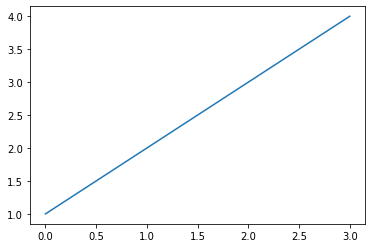

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4])
plt.show()

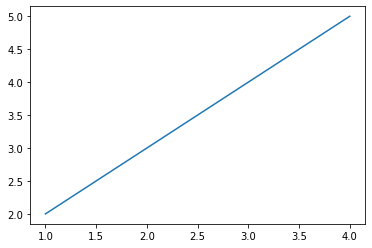

In [ ]:
plt.plot([1,2,3,4],[2,3,4,5]) #plt.plot(x,y)
plt.show()

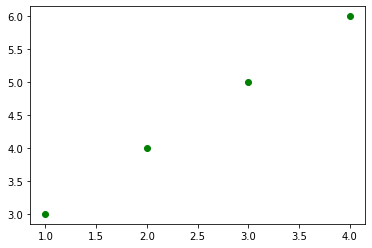

In [ ]:
plt.plot([1,2,3,4],[3,4,5,6],'go')

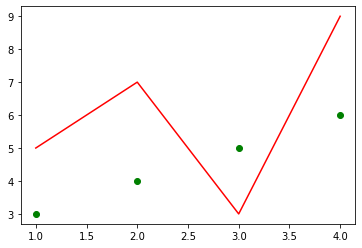

In [ ]:
plt.plot([1,2,3,4],[3,4,5,6],'go',[1,2,3,4],[5,7,3,9],'r')

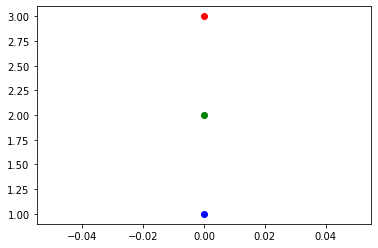

In [ ]:
plt.plot([1],'bo',[2],'go',[3],'ro')

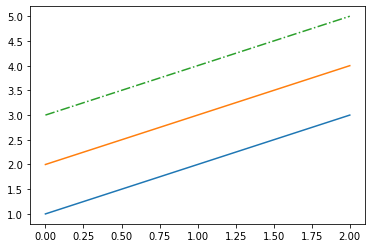

In [ ]:
plt.plot([1,2,3],'-',[2,3,4],'-',[3,4,5],'-.')

파이썬 개요-pandas Series

In [ ]:
import pandas as pd
scores=[85,34,65,78,94]

psl=pd.Series(scores)
print(psl)


0    85
1    34
2    65
3    78
4    94
dtype: int64


In [ ]:
x_list=[1,2,3,4]
y_list=[10,90,44,23]
df=pd.DataFrame([x_list,y_list])
df

,0,1,2,3
0,1,2,3,4
1,10,90,44,23


# 새 섹션

• 헤더

In [ ]:
rh=["번호","점수"]
df2=pd.DataFrame([x_list,y_list],index=rh)
df2

,0,1,2,3
번호,1,2,3,4
점수,10,90,44,23


In [ ]:
names=['홍길동','을지문덕','강감찬']
ages=[20,40,45]

td={
    '이름':names,
    '나이':ages
}
df4=pd.DataFrame(td)
df4

,이름,나이
0,홍길동,20
1,을지문덕,40
2,강감찬,45


In [ ]:
df4.values,df4.columns,df4.index

(array([['홍길동', 20],
        ['을지문덕', 40],
        ['강감찬', 45]], dtype=object),
 Index(['이름', '나이'], dtype='object'),
 RangeIndex(start=0, stop=3, step=1))

파이썬 개요-Pandas(빈 DataFrame)

In [ ]:
edf=pd.DataFrame(columns=range(5)) #DataFrame 스키마 정의
edf

,0,1,2,3,4


In [ ]:
edf.loc[0]=[1,2,3,4,5] #DataFrame 개체에 데이터추가
edf

,0,1,2,3,4
0,1,2,3,4,5


In [ ]:
edf2=pd.DataFrame(columns=range(5)) #DataFrame 스키마 정의
edf2

,0,1,2,3,4


In [ ]:
edf2.loc[0]=[1,2,3,4,5] #DataFrame 개체에 데이터추가
edf2

,0,1,2,3,4
0,1,2,3,4,5


In [ ]:
edf3=edf.append(edf2)
edf3

,0,1,2,3,4
0,1,2,3,4,5
0,1,2,3,4,5


In [ ]:
edf4=pd.DataFrame([[6],[16]],columns=range(5,6))
edf4

,5
0,6
1,16


In [ ]:
edf5=edf3.join(edf4)
edf5

,0,1,2,3,4,5
0,1,2,3,4,5,6
0,1,2,3,4,5,6


In [ ]:
edf5.index=range(1,3)
edf5

,1,2,3,4,5,6
1,1,2,3,4,5,6
2,1,2,3,4,5,6


In [ ]:
edf5.columns=range(1,7)
edf5

,1,2,3,4,5,6
1,1,2,3,4,5,6
2,1,2,3,4,5,6


In [ ]:
edf5.rename(index={2:6},inplace=True)
edf5

,1,2,3,4,5,6
1,1,2,3,4,5,6
6,1,2,3,4,5,6


In [ ]:
edf5.rename(columns={6:7},inplace=True)
edf5

,1,2,3,4,5,7
1,1,2,3,4,5,6
6,1,2,3,4,5,6


In [ ]:
edf5.loc[2]=[21,22,23,24,25,26]
edf5

,1,2,3,4,5,7
1,1,2,3,4,5,6
6,1,2,3,4,5,6
2,21,22,23,24,25,26


In [ ]:
import numpy as np
edf5[6]=np.nan
edf5

,1,2,3,4,5,7,6
1,1,2,3,4,5,6,NaN
6,1,2,3,4,5,6,NaN
2,21,22,23,24,25,26,NaN


In [ ]:
edf6=edf5.reindex(index=[1,2,6])
edf6

,1,2,3,4,5,7,6
1,1,2,3,4,5,6,NaN
2,21,22,23,24,25,26,NaN
6,1,2,3,4,5,6,NaN


In [ ]:
edf7=edf6[list(range(1,8))]
edf7

,1,2,3,4,5,6,7
1,1,2,3,4,5,NaN,6
2,21,22,23,24,25,NaN,26
6,1,2,3,4,5,NaN,6
